In [57]:
import requests
import json 
import geojson
import geopandas as gpd 
from shapely.wkt import loads

geomark_id = 'gm-abcdefghijklmnopqrstuv0bcislands'
format = 'json'  # Desired format: 'json', 'kml', 'gml', 'wkt'
srid = 4326  # Spatial Reference System Identifier

url = f'https://apps.gov.bc.ca/pub/geomark/geomarks/{geomark_id}/feature.{format}?srid={srid}'

response = requests.get(url)

if response.status_code == 200:
    geometry_data = response.json()  # or response.text for 'wkt' format
    print(geometry_data)
else:
    print(f'Error fetching data: {response.status_code}')

{'items': [{'id': 'gm-abcdefghijklmnopqrstuv0bcislands', 'url': 'https://apps.gov.bc.ca/pub/geomark/geomarks/gm-abcdefghijklmnopqrstuv0bcislands', 'geometryType': 'MultiPolygon', 'numPolygons': 3, 'numParts': 3, 'createDate': '2011-05-12', 'minX': -138.971885, 'minY': 48.240116, 'maxX': -114.01435, 'maxY': 59.990216, 'centroidX': -125.014391, 'centroidY': 54.73437, 'numVertices': 30, 'length': 6401999.921720007, 'area': 1272199903765, 'isValid': True, 'isSimple': True, 'isRobust': True, 'minimumClearance': 13946.188, 'geometry': 'SRID=4326;MULTIPOLYGON(((-138.971885 59.834881,-132.646749 54.549674,-131.191845 54.61199,-130.412631 53.393019,-127.781788 51.074595,-125.396011 50.34544,-123.458319 49.276704,-122.520115 48.242418,-114.01435 49.021879,-120.071089 59.990216,-138.971885 59.834881)),((-133.150451 53.728594,-132.372295 52.565245,-131.081532 51.998853,-130.781531 52.155337,-131.637267 53.105476,-131.373205 54.029393,-132.860271 54.27441,-133.150451 53.728594)),((-128.381685 50.72

In [58]:
if next(iter(geometry_data)) == 'items':
    geo=(geometry_data['items'][0]['geometry'])
else: 
    geo=(geometry_data['geometry'])

print(geo)

SRID=4326;MULTIPOLYGON(((-138.971885 59.834881,-132.646749 54.549674,-131.191845 54.61199,-130.412631 53.393019,-127.781788 51.074595,-125.396011 50.34544,-123.458319 49.276704,-122.520115 48.242418,-114.01435 49.021879,-120.071089 59.990216,-138.971885 59.834881)),((-133.150451 53.728594,-132.372295 52.565245,-131.081532 51.998853,-130.781531 52.155337,-131.637267 53.105476,-131.373205 54.029393,-132.860271 54.27441,-133.150451 53.728594)),((-128.381685 50.724647,-127.798769 50.101624,-126.563052 49.32602,-125.031493 48.5512,-123.726898 48.240116,-123.063842 48.340719,-123.51209 48.904238,-124.165675 49.146052,-125.288438 50.125337,-127.854677 50.902182,-128.381685 50.724647)))


In [59]:
srid, wkt = geo.split(";")
srid = int(srid.split("=")[1])
geometry = loads(wkt)

In [60]:
gdf = gpd.GeoDataFrame({"geometry": [geometry]}, crs=f"EPSG:{srid}")

<Axes: >

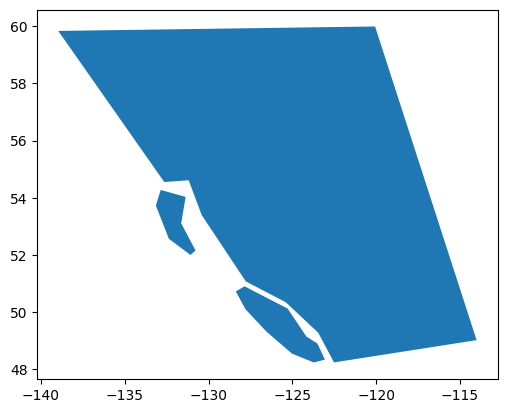

In [61]:
gdf.plot()